

# Exploratory Data Analysis using Python - Data Science 


In [1]:
your_local_path="C:/Users/s.mudalapuram/Documents/PythonMe"

Techniques/questions to look at in this module:
<b><i>
+ How to merge datasets and different merge techniques
+ List of movies that are rated most by users
+ In ratings, how to address ratings sparsity problem
+ Plot distributions
+ Identify different age groups and technique of binning
+ Subgrouping and unstacking
+ Differences in ratings by gender
</b></i>

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Pass column names in names for each CSV

# Load the users data
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(your_local_path+'u.user', sep='|', names=u_cols,
                    encoding='latin-1')

# Load the ratings data
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(your_local_path+'u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols

# Load the movies data
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv(your_local_path+'u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

In [6]:
# Check the structure of Users data
users.shape
users.head()
ratings.head()
movies.head()


,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [7]:
# Check few sample values of user data
users.head(20)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [8]:
# Get information on user data
movies.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
sex           943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [9]:
# Get data type information of movies data
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

In [12]:
# Describe the spread of the users data
users.describe()
ratings.describe()
movies.describe()

,movie_id,video_release_date
count,1682.000000,0.0
mean,841.500000,NaN
std,485.695893,NaN
min,1.000000,NaN
25%,421.250000,NaN
50%,841.500000,NaN
75%,1261.750000,NaN
max,1682.000000,NaN


In [13]:
# Get sample movie ids
movies['title'].head(10)

0                                     Toy Story (1995)
1                                     GoldenEye (1995)
2                                    Four Rooms (1995)
3                                    Get Shorty (1995)
4                                       Copycat (1995)
5    Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6                                Twelve Monkeys (1995)
7                                          Babe (1995)
8                              Dead Man Walking (1995)
9                                   Richard III (1995)
Name: title, dtype: object

In [14]:
# Select movie_id, title columns from the movies data
movies[['movie_id','title']].head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [15]:
# Select all the users with age less than 40
users[users.age < 40].tail(20)

,user_id,age,sex,occupation,zip_code
912,913,27,M,student,76201
915,916,27,M,engineer,N2L5N
916,917,22,F,student,20006
918,919,25,M,other,14216
919,920,30,F,artist,90008
920,921,20,F,student,98801
921,922,29,F,administrator,21114
922,923,21,M,student,E2E3R
923,924,29,M,other,11753
924,925,18,F,salesman,49036


In [16]:
# Select the female users with age less than 40  
users[(users.age < 40) & (users.sex == 'F')].head(10)

,user_id,age,sex,occupation,zip_code
4,5,33,F,other,15213
10,11,39,F,other,30329
11,12,28,F,other,06405
17,18,35,F,other,37212
22,23,30,F,artist,48197
23,24,21,F,artist,94533
31,32,28,F,student,78741
33,34,38,F,administrator,42141
34,35,20,F,homemaker,42459
35,36,19,F,student,93117


In [21]:
# Set the user_id column as index
users.reset_index(inplace=True)

In [22]:
users.head()
print(movies.head(),ratings.head(),users.head())

   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...  
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...  
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...  
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...  
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)      user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       8863975

In [24]:
# Merge datasets - Movies, ratings & users
movie_ratings=pd.merge(movies,ratings)
lens = pd.merge(movie_ratings,users)
#movie_ratings.head(50)
lens.tail(200)

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
99800,990,Anna Karenina (1997),04-Apr-1997,NaN,http://us.imdb.com/M/title-exact?Anna%20Kareni...,364,4,875931478,63,M,engineer,01810
99801,1048,She's the One (1996),23-Aug-1996,NaN,http://us.imdb.com/M/title-exact?She's%20the%2...,364,5,875931585,63,M,engineer,01810
99802,261,Air Bud (1997),01-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Air+Bud+(1997),36,5,882157581,19,F,student,93117
99803,268,Chasing Amy (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Chasing+Amy+(...,36,2,882157418,19,F,student,93117
99804,269,"Full Monty, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Full+Monty%2C...,36,3,882157258,19,F,student,93117
99805,288,Scream (1996),20-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Scream%20(1996),36,4,882157227,19,F,student,93117
99806,289,Evita (1996),25-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Evita%20(1996),36,2,882157356,19,F,student,93117
99807,307,"Devil's Advocate, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Devil's+Advoc...,36,4,882157227,19,F,student,93117
99808,310,"Rainmaker, The (1997)",01-Jan-1997,NaN,"http://us.imdb.com/M/title-exact?Rainmaker,+Th...",36,4,882157327,19,F,student,93117
99809,319,Everyone Says I Love You (1996),06-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Everyone%20Sa...,36,2,882157356,19,F,student,93117


In [25]:
# Let us answer some simple questions now. 
# Most rated movies
most_rated=lens.groupby('title').size()
most_rated.sort_values().tail()

title
Liar Liar (1997)             485
Return of the Jedi (1983)    507
Fargo (1996)                 508
Contact (1997)               509
Star Wars (1977)             583
dtype: int64

In [26]:
# Use value_counts() to sort the Most rated movies
lens.title.value_counts()[:20]

Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: title, dtype: int64

In [27]:
# Highest rated movies
lens.groupby('title').agg(np.size)
highest_rating=lens.groupby('title').agg({'rating':[np.size,np.mean]})
highest_rating

rating          
                                                     size      mean
title                                                              
'Til There Was You (1997)                               9  2.333333
1-900 (1994)                                            5  2.600000
101 Dalmatians (1996)                                 109  2.908257
12 Angry Men (1957)                                   125  4.344000
187 (1997)                                             41  3.024390
2 Days in the Valley (1996)                            93  3.225806
20,000 Leagues Under the Sea (1954)                    72  3.500000
2001: A Space Odyssey (1968)                          259  3.969112
3 Ninjas: High Noon At Mega Mountain (1998)             5  1.000000
39 Steps, The (1935)                                   59  4.050847
8 1/2 (1963)                                           38  3.815789
8 Heads in a Duffel Bag (1997)                          4  3.250000
8 Seconds (1994)                                        4  3.750000
A Chef in Love (1996)                                   8  4.125000
Above the Rim (1994)                                    5  3.000000
Absolute Power (1997)                                 127  3.370079
Abyss, The (1989)                                     151  3.589404
Ace Ventura: Pet Detective (1994)                     103  3.048544
Ace Ventura: When Nature Calls (1995)                  37  2.675676
Across the Sea of Time (1995)                           4  2.750000
Addams Family Values (1993)                            87  2.816092
Addicted to Love (1997)                                54  3.166667
Addiction, The (1995)                                  11  2.181818
Adventures of Pinocchio, The (1996)                    39  3.051282
Adventures of Priscilla, Queen of the Desert, T...    111  3.594595
Adventures of Robin Hood, The (1938)                   67  3.791045
Affair to Remember, An (1957)                          26  4.192308
African Queen, The (1951)                             152  4.184211
Afterglow (1997)                                       18  3.111111
Age of Innocence, The (1993)                           65  3.384615
...                                                   ...       ...
Window to Paris (1994)                                  1  4.000000
Wings of Courage (1995)                                 1  4.000000
Wings of Desire (1987)                                 57  4.000000
Wings of the Dove, The (1997)                          75  3.680000
Winnie the Pooh and the Blustery Day (1968)            75  3.800000
Winter Guest, The (1997)                                9  3.444444
Wishmaster (1997)                                      27  2.444444
With Honors (1994)                                     46  3.065217
Withnail and I (1987)                                  13  3.230769
Witness (1985)                                          1  4.000000
Wizard of Oz, The (1939)                              246  4.077236
Wolf (1994)                                            67  2.701493
Woman in Question, The (1950)                           1  1.000000
Women, The (1939)                                      15  3.666667
Wonderful, Horrible Life of Leni Riefenstahl, T...     10  4.000000
Wonderland (1997)                                      10  3.200000
Wooden Man's Bride, The (Wu Kui) (1994)                 3  2.666667
World of Apu, The (Apur Sansar) (1959)                  6  4.000000
Wrong Trousers, The (1993)                            118  4.466102
Wyatt Earp (1994)                                      50  3.100000
Yankee Zulu (1994)                                      1  1.000000
Year of the Horse (1997)                                7  3.285714
You So Crazy (1994)                                     1  3.000000
Young Frankenstein (1974)                             200  3.945000
Young Guns (1988)                                     101  3.207921
Young Guns II (1990)                   

In [122]:
# Sort the output and see what we get
highest_rating.sort_values([('rating','mean')],ascending=False)

rating          
                                                     size      mean
title                                                              
They Made Me a Criminal (1939)                          1  5.000000
Marlene Dietrich: Shadow and Light (1996)               1  5.000000
Saint of Fort Washington, The (1993)                    2  5.000000
Someone Else's America (1995)                           1  5.000000
Star Kid (1997)                                         3  5.000000
Great Day in Harlem, A (1994)                           1  5.000000
Aiqing wansui (1994)                                    1  5.000000
Santa with Muscles (1996)                               2  5.000000
Prefontaine (1997)                                      3  5.000000
Entertaining Angels: The Dorothy Day Story (1996)       1  5.000000
Pather Panchali (1955)                                  8  4.625000
Some Mother's Son (1996)                                2  4.500000
Maya Lin: A Strong Clear Vision (1994)                  4  4.500000
Anna (1996)                                             2  4.500000
Everest (1998)                                          2  4.500000
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Bitter Sugar (Azucar Amargo) (1996)                     3  4.333333
Letter From Death Row, A (1998)                         3  4.333333
Third Man, The (1949)                                  72  4.333333
Citizen Kane (1941)                                   198  4.292929
Some Folks Call It a Sling Blade (1993)                41  4.292683
...                                                   ...       ...
New Age, The (1994)                                     1  1.000000
Good Morning (1971)                                     1  1.000000
Further Gesture, A (1996)                               1  1.000000
Nobody Loves Me (Keiner liebt mich) (1994)              1  1.000000
Lotto Land (1995)                                       1  1.000000
Liebelei (1933)                                         1  1.000000
Girl in the Cadillac (1995)                             1  1.000000
Vie est belle, La (Life is Rosey) (1987)                1  1.000000
Baton Rouge (1988)                                      1  1.000000
Very Natural Thing, A (1974)                            1  1.000000
Bird of Prey (1996)                                     1  1.000000
Office Killer (1997)                                    1  1.000000
Lashou shentan (1992)                                   1  1.000000
August (1996)                                           1  1.000000
Venice/Venice (1992)                                    2  1.000000
Death in the Garden (Mort en ce jardin, La) (1956)      1  1.000000
Careful (1992)                                          1  1.000000
Tigrero: A Film That Was Never Made (1994)              1  1.000000
Butterfly Kiss (1995)                                   1  1.000000
Low Life, The (1994)                                    1  1.000000
To Cross the Rubicon (1991)                             1  1.000000
Modern Affair, A (1995)                                 1  1.000000
Boys in Venice (1996)                                   2  1.000000
Hedd Wyn (1992)                                         1  1.000000
Wend Kuuni (God's Gift) (1982)                          1  1.000000
Eye of Vichy, The (Oeil de Vichy, L') (

In [28]:
# Get movies that have been rated more than 100 times
atleast_100 = highest_rating['rating']['size'] >=200
highest_rating[atleast_100].sort_values([('rating','mean')],ascending=False)[:20]

rating          
                                         size      mean
title                                                  
Schindler's List (1993)                   298  4.466443
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
Godfather, The (1972)                     413  4.283293
Raiders of the Lost Ark (1981)            420  4.252381
Titanic (1997)                            350  4.245714
Empire Strikes Back, The (1980)           367  4.204360
Boot, Das (1981)                          201  4.203980
Godfather: Part II, The (1974)            209  4.186603
Princess Bride, The (1987)                324  4.172840
Amadeus (1984)                            276  4.163043
L.A. Confidential (1997)                  297  4.161616
Fargo (1996)                              508  4.155512
Braveheart (1995)                         297  4.151515

In [29]:
# import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

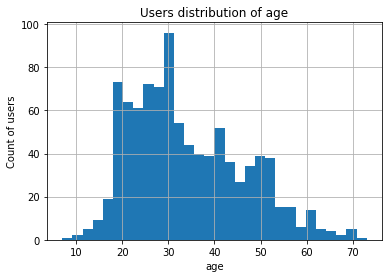

In [30]:
# Plot the user age and count
users.age.hist(bins=30)
plt.title("Users distribution of age")
plt.xlabel("age")
plt.ylabel("Count of users")
plt.show()

In [31]:
# Get the 397 th user's age
lens['age'][397]

21

In [32]:
# Create buckets age-wise ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lables=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group']=pd.cut(lens.age,range(0,81,10),right=True,labels=lables)
lens.age

0        60
1        60
2        60
3        60
4        60
5        60
6        60
7        60
8        60
9        60
10       60
11       60
12       60
13       60
14       60
15       60
16       60
17       60
18       60
19       60
20       60
21       60
22       60
23       60
24       60
25       60
26       60
27       60
28       60
29       60
         ..
99970    18
99971    18
99972    18
99973    18
99974    18
99975    18
99976    18
99977    18
99978    18
99979    19
99980    19
99981    19
99982    19
99983    19
99984    19
99985    19
99986    19
99987    19
99988    19
99989    19
99990    19
99991    19
99992    19
99993    19
99994    19
99995    19
99996    19
99997    19
99998    19
99999    19
Name: age, Length: 100000, dtype: int64

In [33]:
#Group these age buckets and check the rating behaviour. 
#Check who has given max & min number of ratings
lens.groupby('age_group').agg({'rating':[np.size,np.mean]})

rating          
            size      mean
age_group                 
0-9           74  3.608108
10-19      12239  3.548002
20-29      39208  3.443404
30-39      23775  3.573333
40-49      15246  3.574118
50-59       8247  3.691524
60-69       1155  3.612121
70-79         56  3.982143

In [34]:
# Get the top 100 most mentions
most_100 = lens.groupby('movie_id').size().sort_values()
most_100

movie_id
1682      1
814       1
1447      1
1593      1
1452      1
1453      1
1457      1
1458      1
1460      1
1461      1
1587      1
1586      1
1584      1
1583      1
1582      1
1581      1
1595      1
1580      1
677       1
1596      1
1616      1
1236      1
1614      1
711       1
1613      1
857       1
1681      1
1156      1
1606      1
1414      1
       ... 
269     315
748     316
168     316
69      321
173     324
151     326
210     331
79      336
405     344
204     350
313     350
222     365
172     367
117     378
237     384
98      390
7       392
56      394
127     413
174     420
121     429
300     431
1       452
288     478
286     481
294     485
181     507
100     508
258     509
50      583
Length: 1682, dtype: int64

In [36]:
# Set the movie_id as the index
lens.set_index('movie_id',inplace=True)

In [37]:
# Split the observations by title and age group
by_age=lens.loc[most_100.index].groupby(['title','age_group'])
by_age.rating.mean().head(100)

title                                  age_group
'Til There Was You (1997)              10-19        2.333333
                                       20-29        2.000000
                                       30-39        4.000000
1-900 (1994)                           20-29        1.000000
                                       30-39        3.666667
101 Dalmatians (1996)                  0-9          5.000000
                                       10-19        3.153846
                                       20-29        2.684211
                                       30-39        3.205882
                                       40-49        2.700000
                                       50-59        2.000000
                                       60-69        2.000000
12 Angry Men (1957)                    10-19        4.583333
                                       20-29        4.225000
                                       30-39        4.375000
                                    

In [38]:
# Pivot the data and split observations betweem male and female ratings
pivoted = lens.pivot_table(index=['movie_id','title'],columns=['sex'],values='rating',fill_value=0)
pivoted.head(18)

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),3.600000,3.571429
7,Twelve Monkeys (1995),3.560976,3.861290
8,Babe (1995),4.050000,3.974843
9,Dead Man Walking (1995),3.927711,3.884259


In [39]:
# Find the rating behaviour difference between male and female
pivoted['diff']=pivoted.M-pivoted.F
pivoted.tail()

,sex,F,M,diff
movie_id,title,,,
1678,Mat' i syn (1997),0.0,1.0,1.0
1679,B. Monkey (1998),0.0,3.0,3.0
1680,Sliding Doors (1998),0.0,2.0,2.0
1681,You So Crazy (1994),0.0,3.0,3.0
1682,Scream of Stone (Schrei aus Stein) (1991),0.0,3.0,3.0


In [40]:
# Reset movie_id as index again
pivoted.reset_index('movie_id',inplace=True)

In [41]:
# Plot the rating differences between male and female and check for ourselves for patterns
diff_ratings=pivoted[pivoted.movie_id.isin(most_100.index)]['diff']
diff_ratings.head()

title
Toy Story (1995)     0.119994
GoldenEye (1995)    -0.189850
Four Rooms (1995)    0.420608
Get Shorty (1995)    0.191463
Copycat (1995)      -0.632102
Name: diff, dtype: float64

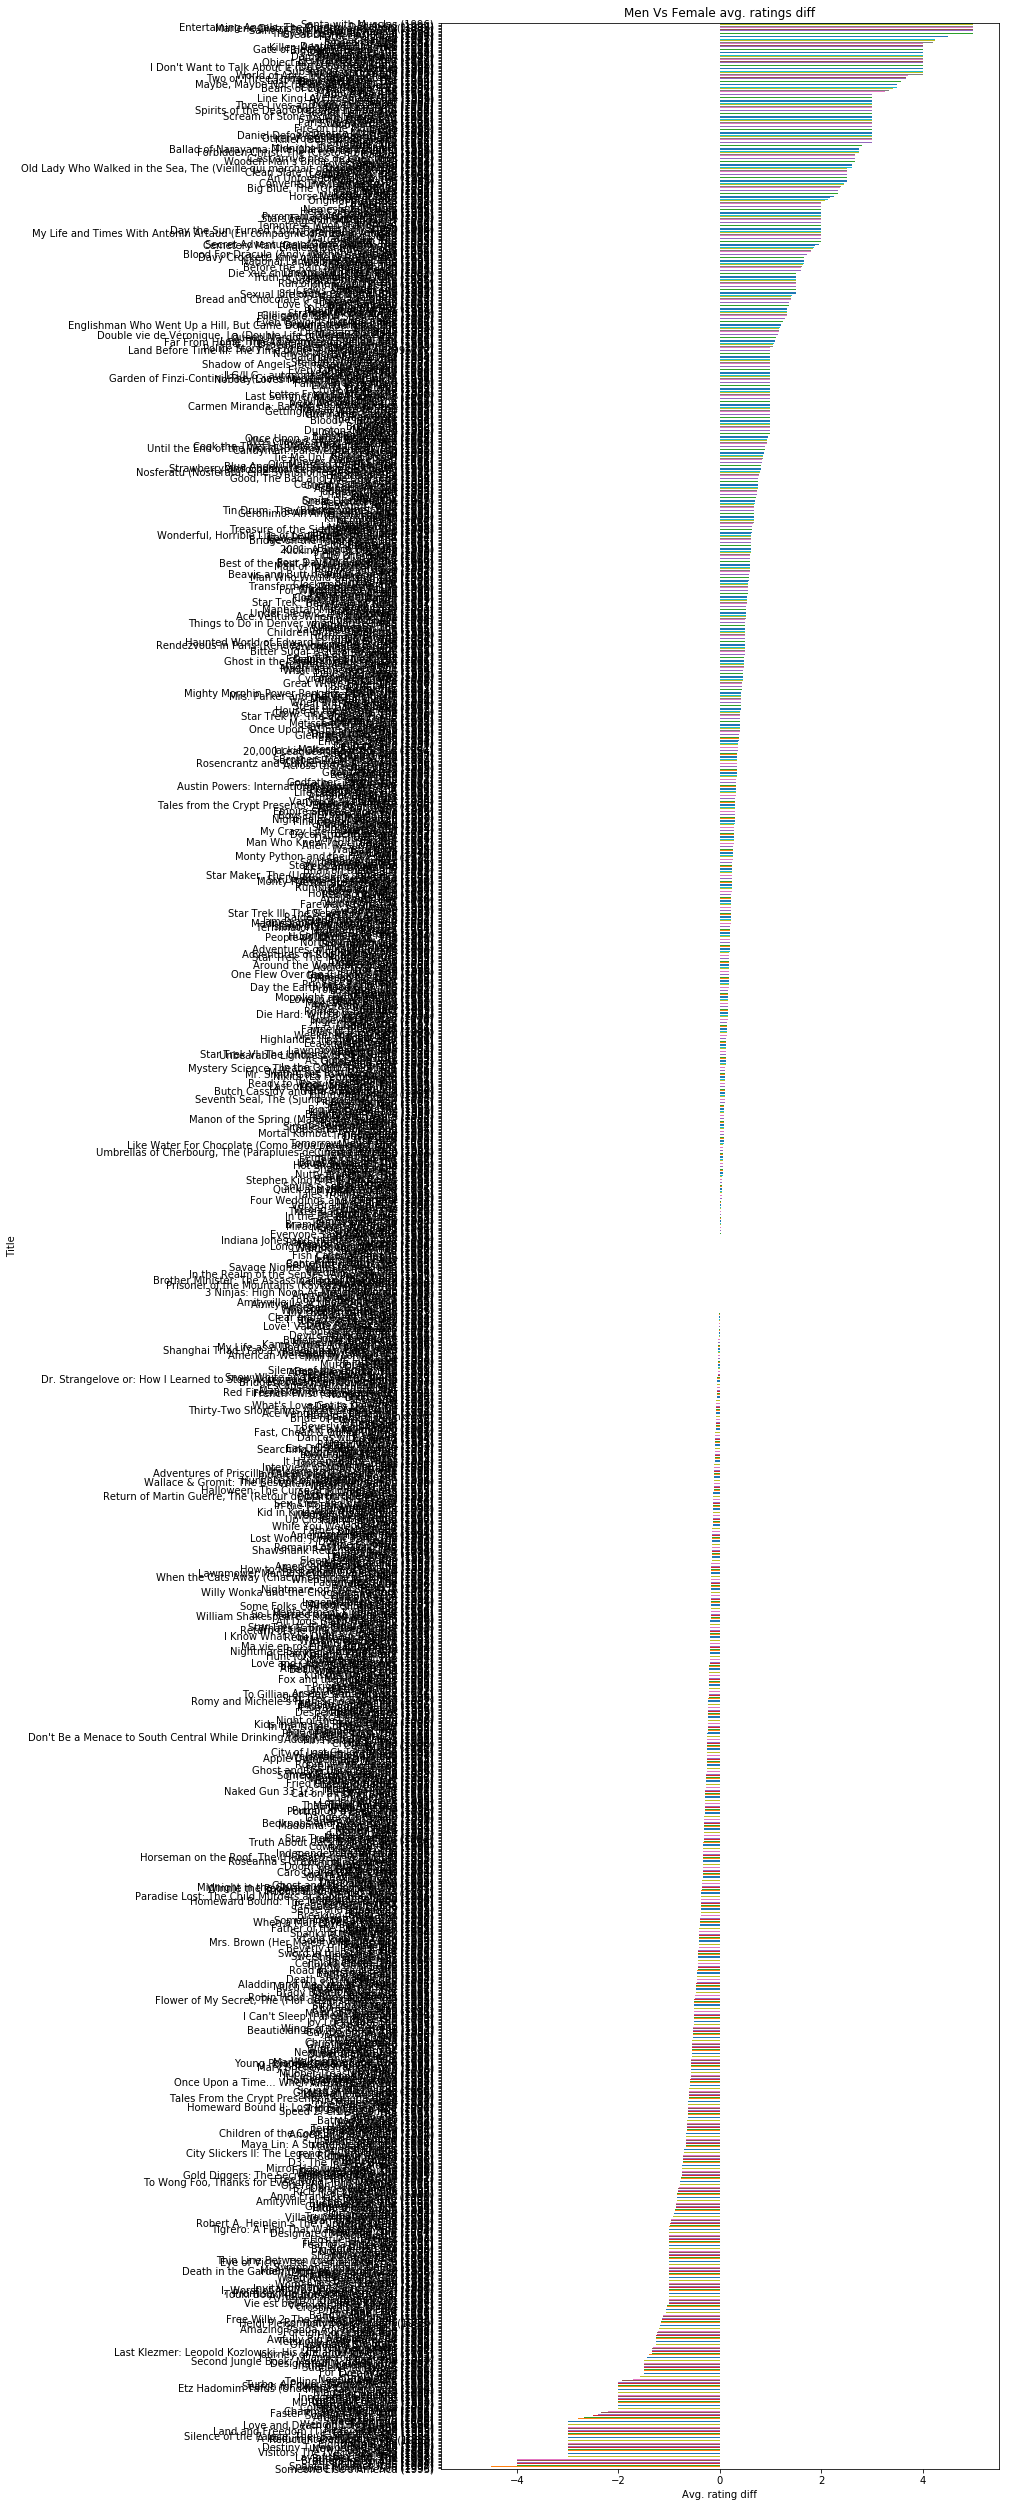

In [42]:
diff_ratings.sort_values().plot(kind='barh',figsize=[10,45])
plt.title("Men Vs Female avg. ratings diff")
plt.ylabel('Title')
plt.xlabel('Avg. rating diff')
plt.show()